<a href="https://colab.research.google.com/github/HafizahBaha/SMS3350/blob/main/CRD_fixed_effect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SMS 3350
# STATISTICAL METHODS
# Completely Randomized Design (Fixed Effect)




# EQUAL REPLICATION





## Data

In [2]:
A=c(1.2,1.4,1.3,1.3,1.3)
B=c(1.3,1.2,1.1,1.0,0.9)
C=c(1.5,1.5,1.6,1.7,1.6)
data=data.frame(A,B,C)
data

A,B,C
<dbl>,<dbl>,<dbl>
1.2,1.3,1.5
1.4,1.2,1.5
1.3,1.1,1.6
1.3,1.0,1.7
1.3,0.9,1.6


### Stack the data 

In [3]:
Data.2=stack(data)
colnames(Data.2)=c("Height","Fertilizer")
Data.2

Height,Fertilizer
<dbl>,<fct>
1.2,A
1.4,A
1.3,A
1.3,A
1.3,A
1.3,B
1.2,B
1.1,B
1.0,B


### Explore the data

In [4]:
##structure of data
str(Data.2)

'data.frame':	15 obs. of  2 variables:
 $ Height    : num  1.2 1.4 1.3 1.3 1.3 1.3 1.2 1.1 1 0.9 ...
 $ Fertilizer: Factor w/ 3 levels "A","B","C": 1 1 1 1 1 2 2 2 2 2 ...


In [6]:
install.packages("rstatix")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘pbkrtest’, ‘lme4’, ‘car’




In [7]:
library(rstatix)


Attaching package: ‘rstatix’


The following object is masked from ‘package:stats’:

    filter




In [8]:
Data.2 %>%
group_by(Fertilizer) %>%
get_summary_stats(`Height`, type = "mean_sd")

Fertilizer,variable,n,mean,sd
<fct>,<chr>,<dbl>,<dbl>,<dbl>
A,Height,5,1.30,0.071
B,Height,5,1.10,0.158
C,Height,5,1.58,0.084


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] 4

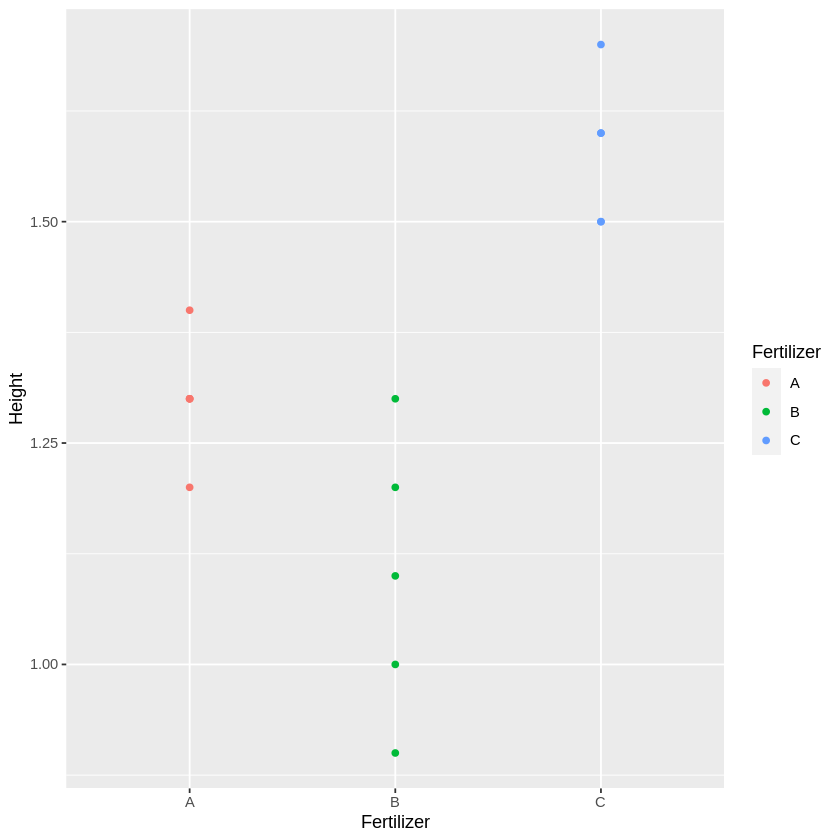

In [9]:
##Visualization
install.packages("ggplot2")
library(ggplot2)
ggplot(data = Data.2) +
geom_point(mapping = aes(x = Fertilizer, y = Height, color = Fertilizer))
4

## ANOVA

In [10]:
fit= aov(Height~Fertilizer,data = Data.2)
summary(fit)

            Df Sum Sq Mean Sq F value   Pr(>F)    
Fertilizer   2 0.5813 0.29067   23.57 6.98e-05 ***
Residuals   12 0.1480 0.01233                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

## Post Hoc  

### LSD

In [11]:
install.packages("DescTools")
library(DescTools)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘rootSolve’, ‘e1071’, ‘lmom’, ‘mvtnorm’, ‘expm’, ‘Exact’, ‘gld’, ‘BH’




In [12]:
LSD.1=PostHocTest(aov(Height ~ Fertilizer, data = Data.2), method = "lsd")
LSD.1


  Posthoc multiple comparisons of means : Fisher LSD 
    95% family-wise confidence level

$Fertilizer
     diff     lwr.ci      upr.ci    pval    
B-A -0.20 -0.3530348 -0.04696522  0.0147 *  
C-A  0.28  0.1269652  0.43303478  0.0018 ** 
C-B  0.48  0.3269652  0.63303478 1.8e-05 ***

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


### Tukey-Kramer Method

In [13]:
Tukey=PostHocTest(aov(Height ~ Fertilizer, data = Data.2), method = "hsd")
Tukey


  Posthoc multiple comparisons of means : Tukey HSD 
    95% family-wise confidence level

$Fertilizer
     diff      lwr.ci      upr.ci   pval    
B-A -0.20 -0.38738458 -0.01261542 0.0364 *  
C-A  0.28  0.09261542  0.46738458 0.0047 ** 
C-B  0.48  0.29261542  0.66738458  5e-05 ***

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


## Checking Model assumption

### Normality test

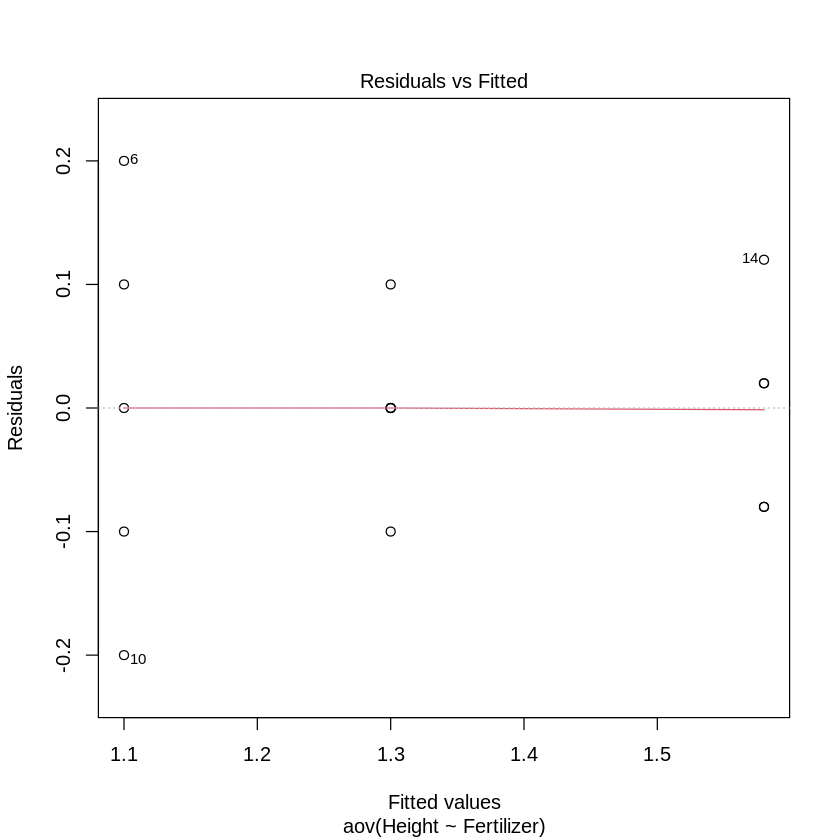

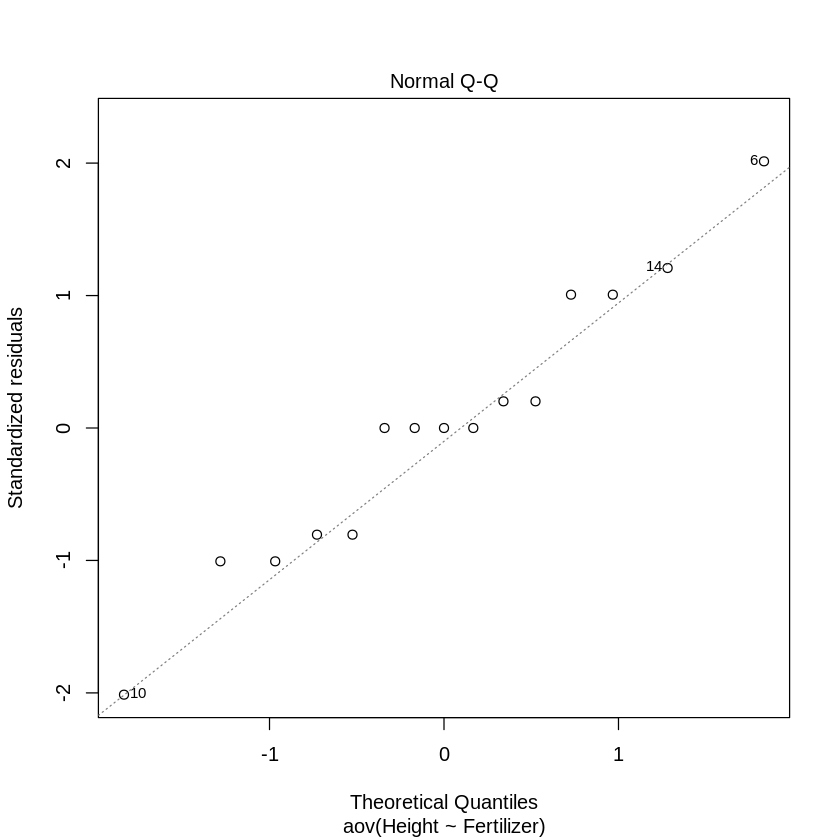

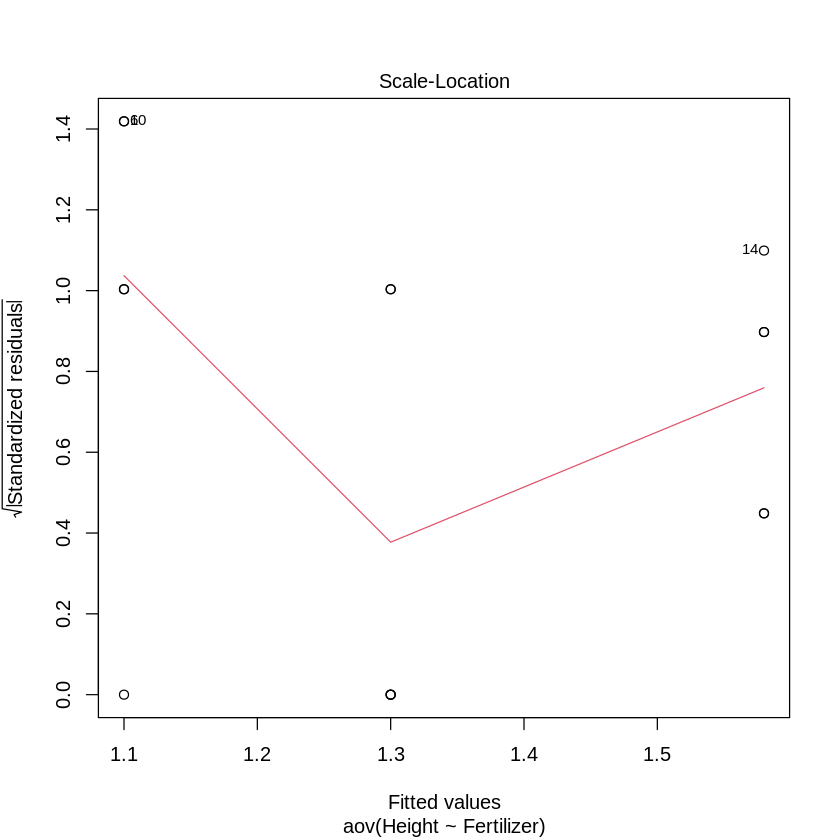

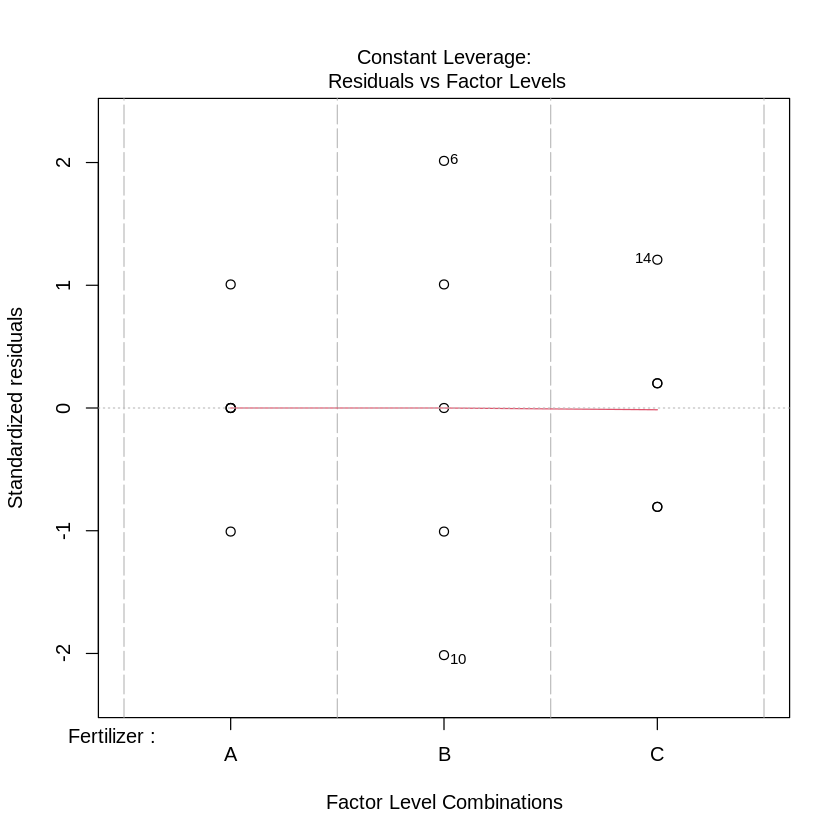

In [14]:
plot(fit)

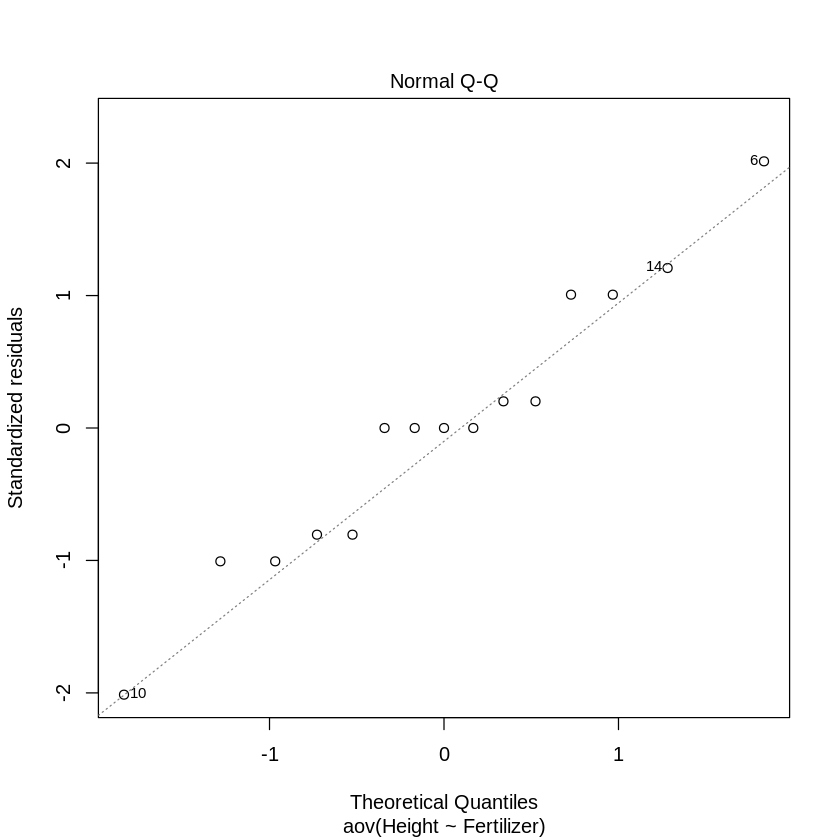

In [15]:
plot(fit,2)

In [16]:
# Compute Shapiro-Wilk test of normality
shapiro_test(residuals(fit))

variable,statistic,p.value
<chr>,<dbl>,<dbl>
residuals(fit),0.9639607,0.7607993


### Constant variance

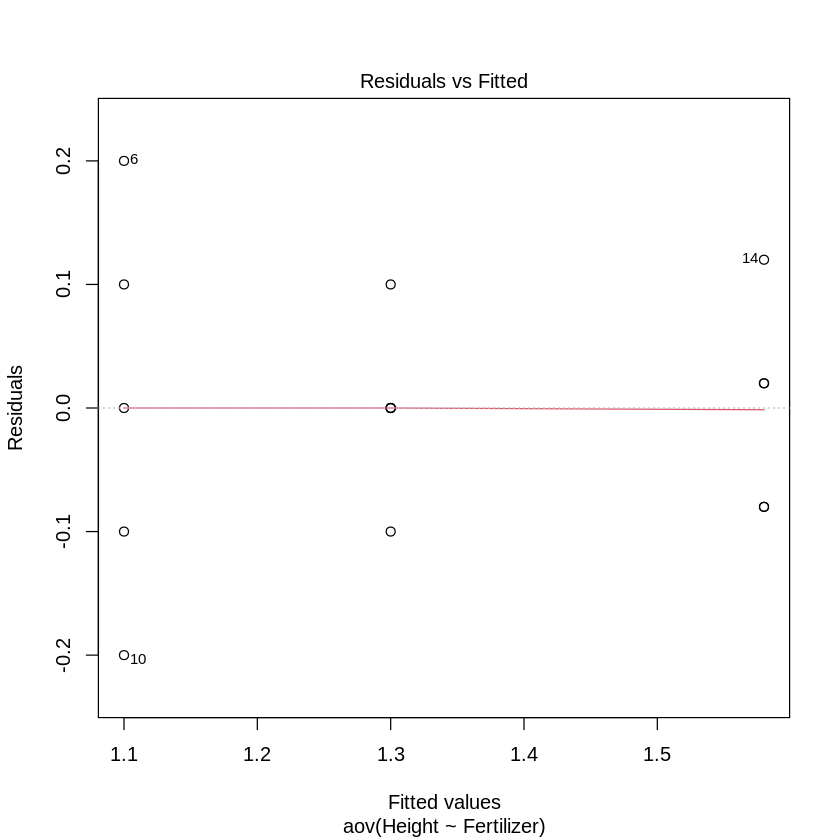

In [17]:
plot(fit,which=1)

In [18]:
Data.2%>% levene_test(Height ~ Fertilizer)

df1,df2,statistic,p
<int>,<int>,<dbl>,<dbl>
2,12,2,0.1779785


# UNEQUAL REPLICATION

## Data

### Import Data 

In [ ]:
install.packages("readxl")

In [26]:
library(readxl)
unequal <- read_excel("unequal.xlsx")
unequal

A,B,C,D
<dbl>,<dbl>,<dbl>,<dbl>
2.0,1.7,2.0,2.1
2.2,1.9,2.4,2.2
1.8,1.5,2.7,2.2
2.3,NA,2.5,1.9
1.7,NA,2.4,NA


### Stack the data

In [27]:
raw=as.data.frame(stack(unequal))
colnames(raw)=c("Height2", "Fertilizer2")
raw

Height2,Fertilizer2
<dbl>,<fct>
2.0,A
2.2,A
1.8,A
2.3,A
1.7,A
1.7,B
1.9,B
1.5,B
NA,B


In [28]:
##delete NA
raw2=na.omit(raw)
raw2=as.data.frame(raw2)
raw2

,Height2,Fertilizer2
,<dbl>,<fct>
1,2.0,A
2,2.2,A
3,1.8,A
4,2.3,A
5,1.7,A
6,1.7,B
7,1.9,B
8,1.5,B
11,2.0,C


### Explore the data

In [29]:
##structure of data
str(raw2)

'data.frame':	17 obs. of  2 variables:
 $ Height2    : num  2 2.2 1.8 2.3 1.7 1.7 1.9 1.5 2 2.4 ...
 $ Fertilizer2: Factor w/ 4 levels "A","B","C","D": 1 1 1 1 1 2 2 2 3 3 ...
 - attr(*, "na.action")= 'omit' Named int [1:3] 9 10 20
  ..- attr(*, "names")= chr [1:3] "9" "10" "20"


In [30]:
##summary statistics
raw2 %>%
group_by(Fertilizer2) %>%
get_summary_stats(`Height2`, type = "mean_sd")

Fertilizer2,variable,n,mean,sd
<fct>,<chr>,<dbl>,<dbl>,<dbl>
A,Height2,5,2.0,0.255
B,Height2,3,1.7,0.200
C,Height2,5,2.4,0.255
D,Height2,4,2.1,0.141


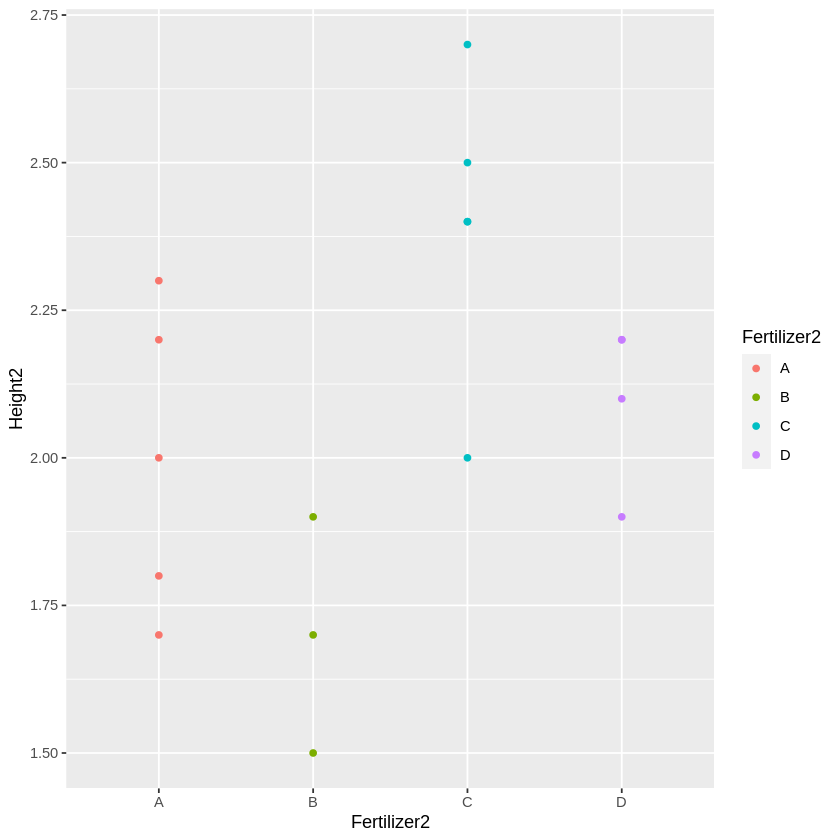

In [31]:
##Visualization
ggplot(data = raw2) +
geom_point(mapping = aes(x = Fertilizer2, y = Height2, color = Fertilizer2))

## ANOVA

In [32]:
fit2= aov(Height2~Fertilizer2,data = raw2)
summary(fit2)

            Df Sum Sq Mean Sq F value  Pr(>F)   
Fertilizer2  3 0.9776  0.3259   6.419 0.00666 **
Residuals   13 0.6600  0.0508                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

## Post Hoc

### LSD

In [37]:
LSD.2=PostHocTest(aov(Height2 ~ Fertilizer2, data = raw2), method = "lsd")
LSD.2


  Posthoc multiple comparisons of means : Fisher LSD 
    95% family-wise confidence level

$Fertilizer2
    diff      lwr.ci     upr.ci    pval    
B-A -0.3 -0.65549011 0.05549011 0.09135 .  
C-A  0.4  0.09213653 0.70786347 0.01483 *  
D-A  0.1 -0.22653852 0.42653852 0.51978    
C-B  0.7  0.34450989 1.05549011 0.00094 ***
D-B  0.4  0.02821954 0.77178046 0.03695 *  
D-C -0.3 -0.62653852 0.02653852 0.06868 .  

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


### Tukey-Kramer Method

In [39]:
Tukey2=PostHocTest(aov(Height2 ~ Fertilizer2, data = raw2), method = "hsd")
Tukey2


  Posthoc multiple comparisons of means : Tukey HSD 
    95% family-wise confidence level

$Fertilizer2
    diff      lwr.ci    upr.ci   pval    
B-A -0.3 -0.78297361 0.1829736 0.3066    
C-A  0.4 -0.01826742 0.8182674 0.0628 .  
D-A  0.1 -0.34363959 0.5436396 0.9096    
C-B  0.7  0.21702639 1.1829736 0.0046 ** 
D-B  0.4 -0.10510589 0.9051059 0.1428    
D-C -0.3 -0.74363959 0.1436396 0.2429    

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


## Checking Model assumption

## Normality test

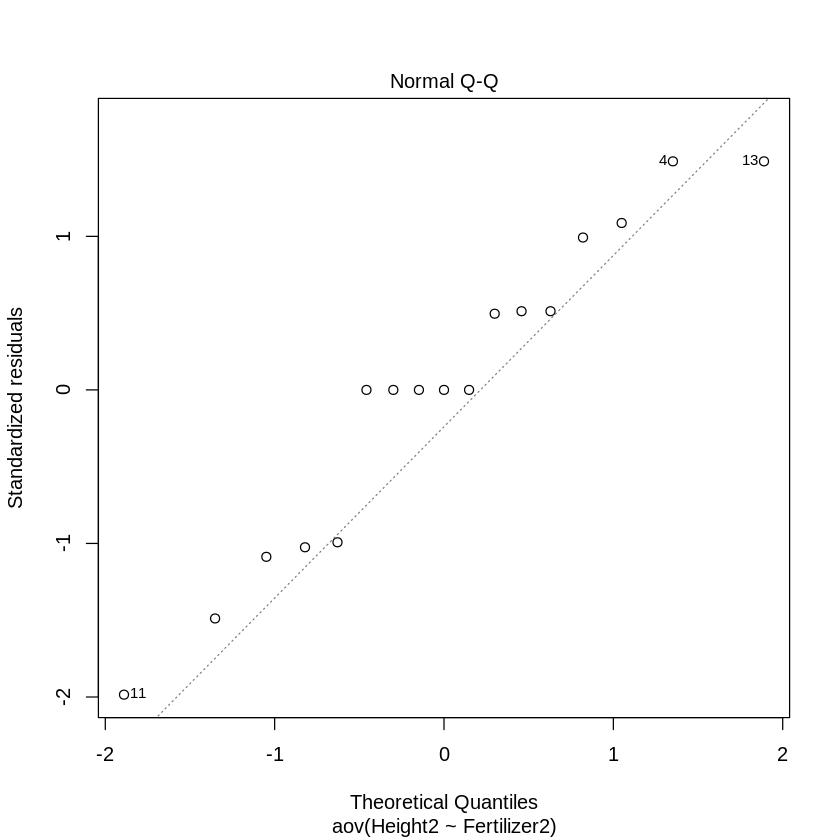

In [33]:
plot(fit2,2)

In [34]:
# Compute Shapiro-Wilk test of normality
shapiro_test(residuals(fit2))

variable,statistic,p.value
<chr>,<dbl>,<dbl>
residuals(fit2),0.9439258,0.3677428


## Constant variance

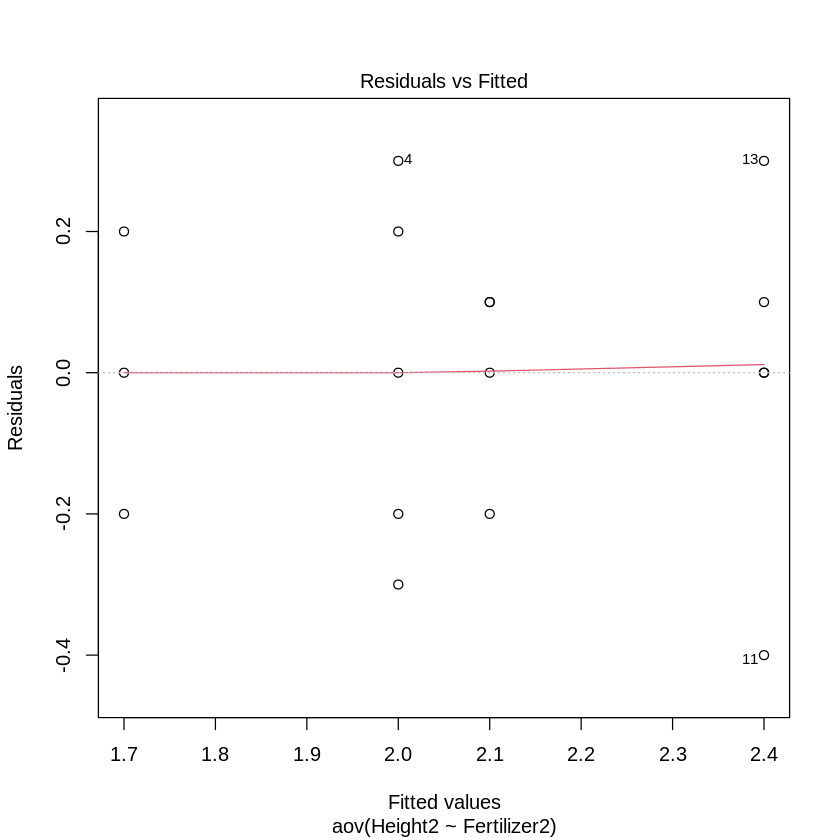

In [35]:
plot(fit2,1)

In [36]:
raw2%>% levene_test(Height2 ~ Fertilizer2)

df1,df2,statistic,p
<int>,<int>,<dbl>,<dbl>
3,13,0.4127635,0.7466422
